# Multiple Linear Regression - Paraíba Income Dataset

This is an example of a multiple linear regression analysis using a dataset of informations about the income of the cities of the state of Paraíba, Brazil.

Our goal here is to try to explain the income per capita of the Paraíba's cities, using some socioeconomic variables. This is a statistical approach, so do not expect machine learning concepts to be in focus.

Let's read the descriptions below:
* **RendaCapita:** The variable of interest. It measures the income of the cities of Paraíba;
* **Adol2grau:** This is a variablle related to the number of adolescents in high school;
* **AdultoSuperior:** This is a variable related to the number of adults in university education;
* **AdolAnalfa:** This is a variable related to the number of illiterate adolescents;
* **AdultosAnalfa:** This is a variables related to the number of illiterate adults;
* **Fecun:** This is a fecundity rate variable;
* **Morte1ano:** This variable is related to the number of kids who died before 1 year old.

In [1]:
# Inicial imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
#from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

plt.figure(figsize = (20, 10))

<Figure size 2000x1000 with 0 Axes>

In [2]:
#Importing the dataset using Pandas
rpb = pd.read_table("C:/Users/Eduardo/Documents/Acadêmicos/Bases de Dados/RendaPB.txt")

#taking a quick look at the variables
rpb.head()

,RendaCapita,Adol2grau,AdultoSuperior,AdolAnalfa,AdultosAnalfa,Fecun,Morte1ano
0,60.38,7.75,0.17,17.11,54.72,3.33,55.30
1,93.48,9.42,1.19,19.23,52.17,3.04,38.83
2,82.87,3.70,1.03,14.21,47.79,3.44,43.62
3,83.42,9.21,0.76,13.90,53.31,2.90,67.95
4,68.80,11.04,0.04,6.14,41.10,3.41,51.53


In [3]:
#Verifing if there is any null value in the variables
rpb.isnull().sum()

RendaCapita       0
Adol2grau         0
AdultoSuperior    0
AdolAnalfa        0
AdultosAnalfa     0
Fecun             0
Morte1ano         0
dtype: int64

## Exploratory Data Analysis

This part of the process is very important to understand the kind of data we are dealing with. First of all, we can ask for some descriptive statistics to summary our informations. Let's see:

In [4]:
#Import statistics to summary the dataset
rpb.describe()

,RendaCapita,Adol2grau,AdultoSuperior,AdolAnalfa,AdultosAnalfa,Fecun,Morte1ano
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,82.336816,10.505919,0.648206,11.243004,45.552960,2.977534,57.165202
std,30.552834,5.777486,0.913395,5.016782,8.875176,0.553649,12.885656
min,42.160000,0.850000,0.020000,2.580000,14.030000,1.930000,25.520000
25%,67.090000,6.775000,0.220000,7.425000,40.025000,2.510000,47.590000
50%,76.440000,9.160000,0.470000,10.870000,45.960000,2.900000,57.840000
75%,89.650000,13.320000,0.725000,14.470000,52.115000,3.330000,67.660000
max,334.690000,41.020000,8.600000,30.880000,66.330000,4.880000,84.290000


From the operation above, we can see some important results, such as the mean of the variables. For example, the mean of income was 82.33; the city with the highest income in Paraíba achieved 334.69 (its capital, João Pessoa), while the lowest income recorded was 42.16.  This results indicates that Paraíba is a relatively unequal state.

Numerical infomations can tell us a lot about the data, however, visualizations usually are the most informative tools to help us understand the data more deeply. Let's take a look at some charts:

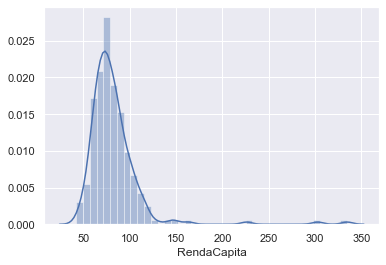

In [5]:
sns.set()
sns.distplot(rpb.RendaCapita)

The plot above shows us the "face" of our target variable. We can see that the variable "RendaCapita" has an asymmetric behavior to the left, that is, most infomation is concentrated between 50 and 125. It's reasonable to say that this variable is not normally distributed, but we'll talk about that later. Let's take a look at the explanatory variables:

Text(4.6, 90, 'Morte1ano')

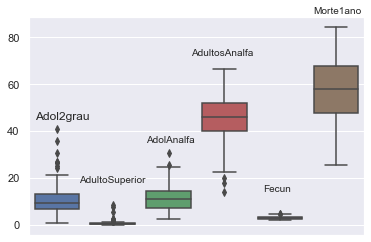

In [6]:
sns.boxplot(data = rpb.drop("RendaCapita", axis = 1)).get_xaxis().set_ticks([])
plt.text(-0.4, 45, "Adol2grau")
plt.text(0.4, 18, "AdultoSuperior", fontsize = 10)
plt.text(1.6, 35, "AdolAnalfa", fontsize = 10)
plt.text(2.4, 72, "AdultosAnalfa", fontsize = 10)
plt.text(3.7, 14, "Fecun", fontsize = 10)
plt.text(4.6, 90, "Morte1ano", fontsize = 10)

Boxplots are really powerfull tools to investigate data, they can show how the infomations are distributed around the location parameter and give a pretty good notion of variation in each variable.

The previous plot shows us that some of the explanatory variables are relatively symmetric (But we cannot say that they are normally distributed) with visually distinct variations, such as "AdultoSuperior", "fecun" and "Morte1ano". The boxplots can also give us a sense of possible outliers.

Althought the linear model only requires normality for the errors (if we want to have inference), we can check if the variables are normally distributed, since normality is a pretty nice property:

In [7]:
print("The p-value of Shapiro test for RendaCapita foi:{}".format(stats.shapiro(rpb.RendaCapita)[1]))
print("The p-value of Shapiro test for Adol2grau foi:{}".format(stats.shapiro(rpb.Adol2grau)[1]))
print("The p-value of Shapiro test for AdultoSuperior foi:{}".format(stats.shapiro(rpb.AdultoSuperior)[1]))
print("The p-value of Shapiro test for AdolAnalfa foi:{}".format(stats.shapiro(rpb.AdolAnalfa)[1]))
print("The p-value of Shapiro test for AdultosAnalfa foi:{}".format(stats.shapiro(rpb.AdultosAnalfa)[1]))
print("The p-value of Shapiro test for Fecun foi:{}".format(stats.shapiro(rpb.Fecun)[1]))
print("The p-value of Shapiro test for Morte1ano foi:{}".format(stats.shapiro(rpb.Morte1ano)[1]))

The p-value of Shapiro test for RendaCapita foi:3.562660183481865e-22
The p-value of Shapiro test for Adol2grau foi:1.498865961901963e-11
The p-value of Shapiro test for AdultoSuperior foi:7.085978086850408e-25
The p-value of Shapiro test for AdolAnalfa foi:5.707781747332774e-05
The p-value of Shapiro test for AdultosAnalfa foi:0.03303367644548416
The p-value of Shapiro test for Fecun foi:1.8646807120603626e-06
The p-value of Shapiro test for Morte1ano foi:0.0008763729128986597


We can see from the p-values that none of the variables of the dataset are normally distributed, but as was said, the linear model do not expect the variables to be normally distribuited, but in a statistical approach, the errors must be.

We saw in the previous boxplots that some of the variables were relatively symmetric, but the Shapiro tests told us that normality should not be considered. One possible reason for not having normally distributed variables is the presence of outliers in the data.

The normal distribution has mean=mode=median, but the mean is very sensitive to outliers. So imagine that we have a sample normally distributed (mean=mode=median) containing no outliers. Will this sample have mean=mode=median if we add some outliers to it? Let's verify some possible outliers in data:

In [8]:
#Adding metrics based on the distance from the mean of the variables
desc_df = rpb.describe()
desc_df.loc["-3std"] = desc_df.loc["mean"] - 3*(desc_df.loc["std"])
desc_df.loc["+3std"] = desc_df.loc["mean"] + 3*(desc_df.loc["std"])
print(desc_df)

       RendaCapita   Adol2grau  AdultoSuperior  AdolAnalfa  AdultosAnalfa  \
count   223.000000  223.000000      223.000000  223.000000     223.000000   
mean     82.336816   10.505919        0.648206   11.243004      45.552960   
std      30.552834    5.777486        0.913395    5.016782       8.875176   
min      42.160000    0.850000        0.020000    2.580000      14.030000   
25%      67.090000    6.775000        0.220000    7.425000      40.025000   
50%      76.440000    9.160000        0.470000   10.870000      45.960000   
75%      89.650000   13.320000        0.725000   14.470000      52.115000   
max     334.690000   41.020000        8.600000   30.880000      66.330000   
-3std    -9.321685   -6.826540       -2.091977   -3.807340      18.927430   
+3std   173.995317   27.838378        3.388390   26.293349      72.178489   

            Fecun   Morte1ano  
count  223.000000  223.000000  
mean     2.977534   57.165202  
std      0.553649   12.885656  
min      1.930000   25.5

In [9]:
#Checking the values that exceed 3 standard deviations from the mean
out = rpb[(np.abs(stats.zscore(rpb))<3).all(axis=1)]
rpb.index.difference(out.index)

Int64Index([39, 43, 49, 50, 93, 164, 219], dtype='int64')

Seven observations were considered to be outliers compared to the rest of the data. However, in this case, it is not reasonable to consider the exclusion of this observations from the dataset. We are dealing with income and socioeconomics data from cities, and we know for fact that some cities are more developed, while others are poorer. With this in mind, we know that we can remove this observations but this action would lead us to inaccurate results.

## The Model and its Assumptions

In its theorical base, the linear regression model classical assumptions can be basically summarized in:
* The mean of the error terms is equal to zero;
* The errors are homoscedastics;
* The errors are normally distributed (optional);
* Linearity;
* The explanatory variables are not perfectly correlated (perfect multicolinearity);
* The error terms are uncorrelated.

### Multicollinearity

To check for multicollinearity, we can start using some basics techniques such as correlation matrices and heatmaps of correlations. Let's check it out:

In [10]:
corr = rpb.corr()
print(corr)

                RendaCapita  Adol2grau  AdultoSuperior  AdolAnalfa  \
RendaCapita        1.000000   0.691360        0.884357   -0.410581   
Adol2grau          0.691360   1.000000        0.531049   -0.550435   
AdultoSuperior     0.884357   0.531049        1.000000   -0.228508   
AdolAnalfa        -0.410581  -0.550435       -0.228508    1.000000   
AdultosAnalfa     -0.678674  -0.742039       -0.492016    0.772217   
Fecun             -0.364014  -0.298567       -0.255959    0.346702   
Morte1ano         -0.407456  -0.416436       -0.246324    0.412061   

                AdultosAnalfa     Fecun  Morte1ano  
RendaCapita         -0.678674 -0.364014  -0.407456  
Adol2grau           -0.742039 -0.298567  -0.416436  
AdultoSuperior      -0.492016 -0.255959  -0.246324  
AdolAnalfa           0.772217  0.346702   0.412061  
AdultosAnalfa        1.000000  0.404182   0.537534  
Fecun                0.404182  1.000000   0.408167  
Morte1ano            0.537534  0.408167   1.000000  


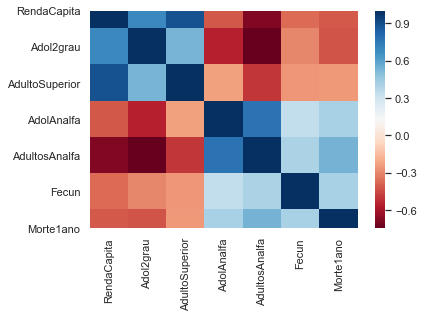

In [11]:
#Heatmap from correlation matrix:
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, cmap = 'RdBu')

To work with a linear model, we expect the explanatory variables to be uncorrelated among them, but highly corraleted with the target variable.

We can see from the previous results that there are some seeming strong (negative) correlation between  "AdultosAnalfa - Adultos2grau" and (positive) between "AdultosAnalfa - AdolAnalfa". This is not a surprising result, once we expect that the number of illiterate adults to decrease as the number of adults in high school increase. And it is also normal to expect that if the number of illiterate adolescents rises, the number of illiterate adults will rise too.

So, we in order to prevent the model from multicollinearity, we have to investigate the consequences of keeping all variables in the model. To do that, we can use a pretty neat tool called Variance Inflation Factor (VIF).

The Variance Inflation Factor works by fitting several models between pairs of explanatory variables. Using the R-squared of these models, the VIF is calculated by the ratio $VIF = \frac{1}{1-R^2}$. If two explanatory variables are highly correlated, the R-squared of their model will be something close to 1 and the VIF wiil result in a very high value (indicating multicollinearity). If R-squared=1, the VIF is not defined and that is a case of perfect multicollinearity (we must avoid that).

Let's calculate the VIFs keeping all variables to see what is going on:

In [12]:
#Selectiong the explanatory variables
X_all = rpb.drop("RendaCapita", axis = 1)

#Adding a constant column to represent the intercept (required by VIF)
X_all = sm.tools.add_constant(X_all)

D:\Python\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [13]:
#Calculating and printing the VIFs
series_before = pd.Series([VIF(X_all.values, i) for i in range(X_all.shape[1])], index = X_all.columns)
print("VIFs Before Removing Any Variable")
print("--"*60)
print(series_before)

VIFs Before Removing Any Variable
------------------------------------------------------------------------------------------------------------------------
const             131.383911
Adol2grau           2.430113
AdultoSuperior      1.569027
AdolAnalfa          2.702076
AdultosAnalfa       4.673505
Fecun               1.293464
Morte1ano           1.506356
dtype: float64


Now we have something a little unexpected. The correlations results indicated that there was a high chance of having multicollinearity among the variable, however the VIF results are denying that, since we consider multicollinearity for values of VIF above 5. Thus, we will buit our initial model considering all explanatory variables, that is, there is no multicollinearity in the data.

### Modeling Process

In [14]:
#instanciating and difining the model
model = sm.OLS(rpb.RendaCapita, X_all)
fit = model.fit()

In [15]:
#summary of the trained model
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            RendaCapita   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     256.6
Date:                Wed, 30 Sep 2020   Prob (F-statistic):           2.42e-95
Time:                        12:01:33   Log-Likelihood:                -844.83
No. Observations:                 223   AIC:                             1704.
Df Residuals:                     216   BIC:                             1728.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            102.1742      8.339     12.252      0.000      85.738     118.611
Adol2grau          0.8551      0.197      4.346      0.000       0.467       1.243
AdultoSuperior    22.9112      1.000     22.912      0.000      20.940      24.882
AdolAnalfa         0.1145      0.239      0.479      0.632      -0.356       0.585
AdultosAnalfa     -0.6347      0.178     -3.573      0.000      -0.985      -0.285
Fecun             -2.6320      1.498     -1.757      0.080      -5.584       0.320
Morte1ano         -0.1436      0.069     -2.068      0.040      -0.281      -0.007
==============================================================================
Omnibus:                        5.795   Durbin-Watson:                   1.765
Prob(Omnibus):                  0.055   Jarque-Bera (JB):                5.568
Skew:                          -0.319   Prob(JB):                       0.0618
Kurtosis:                       3.439   Cond. No.                         873.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The summary method is a great tool. Calling summary from the "fit" object, we get to see some important results of our model, such as R-squared, the F-statistic with its p-value, the t-statistics with its p-values and more.

From the summary above we can see that the R-squared of the model was equal to 0.87, that is, 87% of the variation of the income variable can be explained by the socioeconomics explanatory varibles considered.

The F test is a hypotesis test to investigate the significance of the model and it is also called "Global Adequacy Test". We conclude based on its p-value, that the model is significant.

A import thing to consider in a statistical approach of a linear model is the significance of each variable to the this model. Using the t test we are able to verify if all, some or none of the variables are significant to the model. The t-statistic is  calculated by the ratio between the coefficient of a variable and its standard error and then it can be compared to a t-critic (tabulated value) to make a decision (or decided by the p-value). If the null hypotesis is not rejected, we say that the coefficient is not statistically different from zero, and then we can take the related variable out of the model for not contribuiting to it.

Looking at the p-values of the t tests and considering a significance level of 5%, we can see that 2 of the variables seems to be irrelevant to the model, they are: Adolanalfa and Fecun. Since their p-values are greater the 0.05, we can start taking them out one by one, ALWAYS taking the variable of highest p-value first, and this is because the act of removing the variable of highest p-value can make variables once irrelevant, relevant.

So, considering what was said, let's start taking the "AdolAnalfa" variable out:

In [16]:
X_all = X_all.drop(["AdolAnalfa"], axis = 1)

In [17]:
model = sm.OLS(rpb.RendaCapita, X_all)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            RendaCapita   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     309.0
Date:                Wed, 30 Sep 2020   Prob (F-statistic):           1.47e-96
Time:                        12:01:33   Log-Likelihood:                -844.95
No. Observations:                 223   AIC:                             1702.
Df Residuals:                     217   BIC:                             1722.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            100.7937      7.812     12.902      0.000      85.396     116.191
Adol2grau          0.8522      0.196      4.341      0.000       0.465       1.239
AdultoSuperior    23.0442      0.959     24.030      0.000      21.154      24.934
AdultosAnalfa     -0.5800      0.136     -4.266      0.000      -0.848      -0.312
Fecun             -2.5677      1.489     -1.724      0.086      -5.503       0.367
Morte1ano         -0.1448      0.069     -2.091      0.038      -0.281      -0.008
==============================================================================
Omnibus:                        5.636   Durbin-Watson:                   1.767
Prob(Omnibus):                  0.060   Jarque-Bera (JB):                5.365
Skew:                          -0.319   Prob(JB):                       0.0684
Kurtosis:                       3.413   Cond. No.                         810.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The variable "Fecun" is still not significant to the model. Let's take it out:

In [18]:
X_all = X_all.drop(["Fecun"], axis = 1)

In [19]:
model = sm.OLS(rpb.RendaCapita, X_all)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            RendaCapita   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     382.0
Date:                Wed, 30 Sep 2020   Prob (F-statistic):           3.08e-97
Time:                        12:01:33   Log-Likelihood:                -846.46
No. Observations:                 223   AIC:                             1703.
Df Residuals:                     218   BIC:                             1720.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             96.7034      7.477     12.933      0.000      81.967     111.440
Adol2grau          0.8405      0.197      4.265      0.000       0.452       1.229
AdultoSuperior    23.1879      0.960     24.163      0.000      21.296      25.079
AdultosAnalfa     -0.6197      0.135     -4.605      0.000      -0.885      -0.354
Morte1ano         -0.1749      0.067     -2.596      0.010      -0.308      -0.042
==============================================================================
Omnibus:                        5.296   Durbin-Watson:                   1.752
Prob(Omnibus):                  0.071   Jarque-Bera (JB):                5.005
Skew:                          -0.306   Prob(JB):                       0.0819
Kurtosis:                       3.404   Cond. No.                         769.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now, we can see that all the variables are significant to our model, then we can split the data into train and test sets to produce much reliable results:

In [20]:
#spliting the data in sets of train and test
Xtrain, Xtest, ytrain, ytest = train_test_split(X_all, rpb.RendaCapita, random_state = 97)

In [21]:
model = sm.OLS(ytrain, Xtrain)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            RendaCapita   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     358.9
Date:                Wed, 30 Sep 2020   Prob (F-statistic):           2.27e-79
Time:                        12:01:34   Log-Likelihood:                -631.81
No. Observations:                 167   AIC:                             1274.
Df Residuals:                     162   BIC:                             1289.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             96.8998      8.362     11.588      0.000      80.388     113.412
Adol2grau          0.7277      0.215      3.380      0.001       0.303       1.153
AdultoSuperior    24.0993      1.007     23.930      0.000      22.111      26.088
AdultosAnalfa     -0.5817      0.150     -3.887      0.000      -0.877      -0.286
Morte1ano         -0.2185      0.077     -2.853      0.005      -0.370      -0.067
==============================================================================
Omnibus:                        4.433   Durbin-Watson:                   1.827
Prob(Omnibus):                  0.109   Jarque-Bera (JB):                4.140
Skew:                          -0.382   Prob(JB):                        0.126
Kurtosis:                       3.104   Cond. No.                         743.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Depending on the random_state that you set, this last summary can tell that "Morte1ano" is not significant. It happens because of the variation that can be adhered to the model when the data are splitted. In order to minimize the variation, k-fold cross validation can be used.

#### Interpretation

As we know, the linear model is very interpretable. Looking at the summary above we can analyze the parameters estimates and then make some conclusions about the effect of the explanatory variables over the target variable. For our model, the interpretations were:

* **const(intercept):** The average income of the cities of Paraíba would be 96.9 if all X=0;
* **Adol2grau:** The increase of 1 adolescent in the high school, increases the average income in 0.73;
* **AdultoSuperior:** The increase of 1 person in the university education, increases the average income in 24.09;
* **AdultosAnalfa:** To each new illiterate adult considered, the average income decreases in 0.58;
* **Morte1ano:** To each new child dead before 1 year old, the average income decreases in 0.22.

An important thing to pay attention is the signs of the parameters estimates. in general, we expect certain variables to have an effect on the target target variable in a certain way. For example, if we are talking about the income of cities, we expect a city with a large number of people in university education to have larger income than a city with a small number of people in university education (considering a "City income x People in university education" model). In our model, all signs make sense.

### Residual Analysis

Once we define our model, we are able to analize its residuals in order to verify part of the assumptions. Let's start the analysis investigating possible normality of the residuals:

#### Normality

There are several way to verify if the residuals of our model is normally distributed. Two of the most popular ways are through the Shapiro-Wilks hypotesis test and using the quantile-quantile plot. For the this model, the results for normality were:

In [22]:
#Shapiro-Wilks test
from scipy.stats import shapiro
statistic, pvalue = shapiro(fit.resid)

print("The p-value for the Shapiro test applied to the residuals was:{}".format(pvalue))

The p-value for the Shapiro test applied to the residuals was:0.1221494972705841


Considering a significance level of 5%, we can not reject the null hypotesis of the Shapiro test, that is, the test says that we can consider the residuals normally distributed. To support this statement, let's take a look at the qq-plot of normality for these residuals:

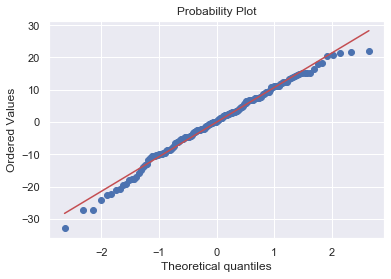

In [23]:
from scipy.stats import probplot
import pylab

probplot(fit.resid, dist = "norm", plot = pylab)
pylab.show()

Note that for the most part, the residuals seems well fitted to line (except for the extremities). That is the indication to support the hypotesis test, thus we can consider the residuals normally distributed.

#### Homoscedasticity

Another assumption of the linear model is the homoscedasticity of the residuals (i.e. constant variance). To verify that, we can also use both plot visualization or hypotesis tests:

In [24]:
#Breusch-Pagan test
from statsmodels.stats.api import het_breuschpagan
from statsmodels.compat import lzip

name = ["statistic", "pvalue", "f value", "f p-value"]
test = het_breuschpagan(fit.resid, fit.model.exog)
lzip(name, test)

[('statistic', 19.84998136405377),
 ('pvalue', 0.0005346288479601174),
 ('f value', 5.463296931229833),
 ('f p-value', 0.00037583453796868167)]

In [25]:
#Goldfeld-Quandt test
from statsmodels.stats.api import het_goldfeldquandt

name = ["F-statistic", "p-value"]
test = het_goldfeldquandt(fit.resid, fit.model.exog)
lzip(name, test)

[('F-statistic', 1.2994959183282642), ('p-value', 0.12384008577918788)]

The two tests gave us diffetent conclusions. According to the Breusch-Pagan test, we have evidence to reject the null hypotesis of homoscedasticity, but if we consider the Goldfeld-Quandt test, we do not have evidence to reject the homoscedasticity of the residues. This can happen often because of the (distinct) mathematical nature of those tests. Usually, people choose to use the Breusch-Pagan test more often. However, a good way to handle this situation is to consider the support of a graphical analysis and we can do that simply by plotting the residuals. If they are distributed symmetrically and randomly around zero, we can consider that the residuals have mean=0 and constant variance. Let's see:

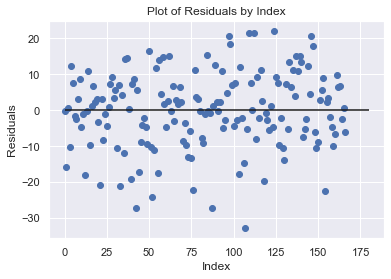

In [26]:
fig = plt.figure()
ax = plt.axes()
ax.scatter(np.arange(0, fit.resid.shape[0],1), fit.resid)
ax.set_title("Plot of Residuals by Index")
ax.set_xlabel("Index")
ax.set_ylabel("Residuals")
plt.hlines(0, 0, 180)

Looking at the plot above, we do not see any pattern, and the observations seems to be relatively symetric around zero. So, although the Breusch-Pagan does not indicate homoscedasticity, the graphical analysis together with the Goldfeld-Quandt test indicate that is reasonable to consider homoscedasticity of the residuals.

#### Non-autocorrelation of the Errors

To verify if the errors are non-corraleted, we can again look at the residues and use two of the most used tools to deal with this situation, the Durbin-Watson test and the graphical analysis of the Autocorrelation Function (ACF). 

In [27]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson(fit.resid)

1.826941483318342

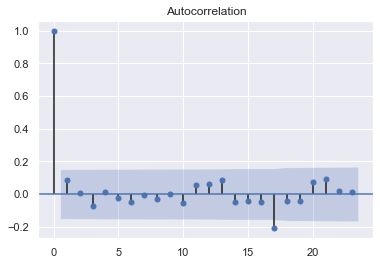

In [28]:
from statsmodels.graphics.tsaplots import plot_acf
acf = plot_acf(fit.resid)

The Durbin-Watson statistic is a number between 0 and 4. If it is close to 0, we have indication that there is positive autocorrelation in the residues, and if it is close to 4, the autocorrelation is negative. 

The result of the Durbin Watson statistic for our model was 1.83 (something close to 2). Based on that, we have an indication of non-autocorrelation in the residues.

To confirm what was said by the Durbin-Watson statistic, we can look at the ACF plot. On the y-axis we got the correlation values (between -1 and 1) and, on the x-axis we got the residual autocorrelation indexes. In general, the autocorrelation exist if some point falls out of the bounds (the blue interval). However, we should analyze each situation.

In our case, we got one obsevation out of the bounds (the first one is not considered because the autocorrelation between the "zero" residue with itself will always be 1), but the value of this point is something around -0.2, which is a relatively small value for autocorrelation. You can be strict and decide to consider that there is autocorrelation in the residues, however in practice, we have to be malleable in this kind of situation. So, for this case, considering the results of the Durbin-Watson statistic and the ACF plot, we conclud that there is no autocorrelation in the residues.

#### Predictions

Once we checked for multicolinearity, normality, homoscedasticity and autocorrelation, we can use our model to make predictions for the test set that we defined before and then evaluete the precision of the model based on a couple metrics.

In [40]:
ypred = fit.predict(Xtest)
print(pd.concat([ytest.rename("Observed"), ypred.rename("Predicted")], axis = 1))

     Observed   Predicted
38     100.45   89.640044
5       56.19   59.638275
158     69.31   62.669768
176    112.25   84.401925
110     88.77   67.973917
37      82.02   83.705262
106    100.56   71.605275
209    144.25  127.350338
65      72.07   65.103196
47      73.50   61.278272
202     86.94   80.667467
22      61.78   66.467795
48      73.48   75.009902
101    110.09  119.098573
54      71.81   67.383038
160     71.91   63.547883
42      61.36   66.510367
52      77.08   73.860057
135     63.83   77.116143
147     77.57   63.599170
113     75.59   62.061133
211     63.68   59.280331
119     76.76   74.611666
171     53.44   65.407872
121    113.57   99.381466
220     62.65   61.008806
74      79.05   59.595620
63      75.37   63.449299
123     66.72   59.175737
20      76.99   67.506589
16      82.45   74.200744
58      80.44   75.248416
193     67.03   64.937921
2       82.87   87.086752
99      70.68   61.660643
76     105.47  100.787266
153     86.45   77.512295
78      89.8

In [39]:
print("Root Mean Squared Error")
print(np.sqrt(mean_squared_error(ytest, ypred)))
print("------------------")
print("Mean Absolute Error")
print(mean_absolute_error(ytest, ypred))
print("------------------")

Root Mean Squared Error
11.52478336235018
------------------
Mean Absolute Error
9.26210679946725
------------------


If we look at those results of observed and predicted values, we can see that some of the observations were pretty well predicted, but some of them were predicted in a relatively poor way and that resulted in values of RMSE and MAE of 11.52 and 9.26, respectively.

#### Linearity

The last thing that we are going to check is linearity. To verify if the linear model is well specified to the data, we can use some hypotesis tests such as the Harvey-Collier test or the RESET test, however here we will only use the graphical analysis.

In terms of linear regression, the perfect situation for a model is the one where the observed values are numerically equal to the predicted values. This would give us a perfect straight line on a scatter plot, so in general, the model is well specified if we can identify a "linear dispersion" on a scatter plot between the observed and predict values.

Let's see how linear is our plot:

Text(0, 0.5, 'Observed Values')

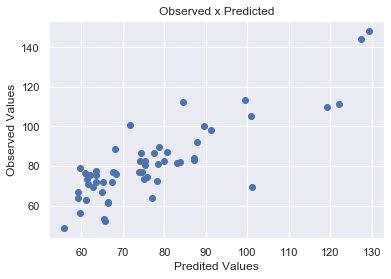

In [41]:
fig = plt.figure()
ax = plt.axes()

ax.scatter(ypred.ravel(), ytest.ravel())
ax.set_title("Observed x Predicted")
ax.set_xlabel("Predited Values")
ax.set_ylabel("Observed Values")

Just like we imagined, some of the observation are distant from an imaginary straight line because these ones were not so well fitted by the model. If we consider the dispersion in general, we can see that there is a relatively linear pattern on that, which tells us that the linear model is a good option for this dataset.